# Question 1

In [1839]:
#from __future__ import division
import numpy as np
import random
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=None, suppress=True)

In [1840]:
#reading the file
with open("Dataset.data") as fin:
    data = np.empty((14), float)
    #print(data.shape)
    for line in fin:
        line = line.rstrip('\n')
        while line.endswith('\\'):
            line = line[:-1] + next(fin).rstrip('\n')
        temp=np.fromstring(line,dtype="float",sep=' ')
        data=np.row_stack((data,temp))
    #print(data.shape)

In [1841]:
data=data[1:]
print("Actual data:",data.shape)
print(data[0:5,:])

Actual data: (506, 14)
[[  0.00632  18.        2.31      0.        0.538     6.575    65.2
    4.09      1.      296.       15.3     396.9       4.98     24.     ]
 [  0.02731   0.        7.07      0.        0.469     6.421    78.9
    4.9671    2.      242.       17.8     396.9       9.14     21.6    ]
 [  0.02729   0.        7.07      0.        0.469     7.185    61.1
    4.9671    2.      242.       17.8     392.83      4.03     34.7    ]
 [  0.03237   0.        2.18      0.        0.458     6.998    45.8
    6.0622    3.      222.       18.7     394.63      2.94     33.4    ]
 [  0.06905   0.        2.18      0.        0.458     7.147    54.2
    6.0622    3.      222.       18.7     396.9       5.33     36.2    ]]


# Q_A

In [1842]:
def trainTestSplit(data,split):
    train=list()
    train_length=len(data)*split
    test=list(data)
    while(len(train)<train_length):
        index=random.randrange(len(test))
        train.append(test.pop(index))
    return np.asarray(test),np.asarray(train)

In [1843]:
test,train=trainTestSplit(data,0.80)
print("Test:",test.shape)
print("Train:",train.shape)
#print("Test:",train)


Test: (101, 14)
Train: (405, 14)


# Q_B

In [1844]:
#appending 1 to the end
def modifyIndependentDataset(train):
    #print("train shape:",train.shape)
    independent=train[:,:-1]
    dependent=train[:,-1]
    ones=np.ones([len(independent),1])
    #print(ones.shape)
    independent=independent.T
    ones=ones.T
    #print(ones.shape)
    #print(independent.shape)
    independent=np.concatenate((independent,ones),axis=0)
    return independent,dependent


In [1845]:
def wCalculation(independent,dependent):
    # calculating w
    #print(np.dot(np.linalg.inv((np.dot(independent,independent.T))),independent))
    w=np.dot(np.dot(np.linalg.inv((np.dot(independent,independent.T))),independent),dependent)
    return w

In [1846]:
def predict(w,data):
    predicted_value=np.dot(w.T,data)
    return predicted_value

In [1847]:
def rmseCalculation(predicted_value,dependent):
    #calculating RMSE
    rmse=np.sqrt(np.sum(np.square(np.subtract(dependent,predicted_value)))/len(predicted_value))
    #print(np.subtract(dependent,predicted_value))
    #rmse=np.sqrt(mean_squared_error(dependent,predicted_value))
    #rmse=np.sqrt(np.sum(np.square(np.subtract(dependent,predicted_value)))/len(predicted_value))
    #print('{0:.10f}'.format(rmse))
    return rmse

In [1848]:
# independent=train[:,:-1]
# #print(independent.shape)
# dependent=train[:,-1]
# print("Dependent shape:",dependent.shape)
independent,dependent=modifyIndependentDataset(train)
print("Independent shape:",independent.shape)
print("Dependent shape:",dependent.shape)
w=wCalculation(independent,dependent)
print("W shape:",w.shape)
#print(w)
predicted_value=predict(w,independent)
print("prediceted shape:",predicted_value.shape)
rmse_train=rmseCalculation(predicted_value,dependent)
print("RMSE_train:",rmse_train)

independent_test,dependent_test=modifyIndependentDataset(test)
predicted_value=predict(w,independent_test)
rmse_test=rmseCalculation(predicted_value,dependent_test)
print("RMSE_test:",rmse_test)

Independent shape: (14, 405)
Dependent shape: (405,)
W shape: (14,)
prediceted shape: (405,)
RMSE_train: 4.554428842307025
RMSE_test: 5.309221907883951


# Q_C

In [1849]:
def intilizedata(train):
    train_new=train[:,-2:]
    #print("New training data shape:",train_new.shape)
    return train_new

# Q_D

In [1850]:
#Cross validation by k folds
def kFoldCrossValidation(train_new,no_of_folds):
    fold_length=int(len(train_new)/no_of_folds)
    #temp=train_new
    #print(len(train_new))
    #print(fold_length)
    fold_list=list()
    for i in range(no_of_folds):
        #train_new=temp
        fold=np.ones([1,len(train_new[0])])
        #print(fold.shape)
        while(len(fold)<=fold_length):
            index=random.randrange(len(train_new))
            #print(index)
            fold=np.row_stack((fold,train_new[index,:]))
            train_new=np.delete(train_new, obj=index, axis=0)
            #print("train_new:",train_new.shape)
        #print("fold shape:",fold.shape)
        fold_list.append(fold[1:,:])
    #print(fold_list[4].shape)
    return fold_list

In [1851]:
train_new=intilizedata(train)
fold_list=kFoldCrossValidation(train_new,5)
print("folds shape:",fold_list[4].shape)

folds shape: (81, 2)


# Q_E

In [1852]:
def predictCrossValidation(fold_list):
    validation_error=0
    train_error=0
    for i in range(len(fold_list)):
        fold=np.ones([1,len(fold_list[0][0])])
        #print(fold.shape)
        for j in range(len(fold_list)):
            if i!=j:
                fold=np.row_stack((fold,fold_list[j]))
        fold=fold[1:,:]
        independent,dependent=modifyIndependentDataset(fold)
        w=wCalculation(independent,dependent)
        #print(w.shape)
        predicted_value=predict(w,independent)
        train_error=train_error+rmseCalculation(predicted_value,dependent) 
        independent,dependent=modifyIndependentDataset(fold_list[i])
        predicted_value=predict(w,independent)
        validation_error+=rmseCalculation(predicted_value,dependent)
    return validation_error/len(fold_list),train_error/len(fold_list)

In [1853]:
def trainNewModification(train_new,deg):
    #print(len(train))
    final=np.ones([len(train_new),1])
    temp=train_new
    train_new=train_new[:,0:1]
    #print(train.shape)
    #print(train_new.shape)
    for i in range(deg,0,-1):
        #print(i)
        final=np.column_stack((final,np.power(train_new,i)))
    #print(final.shape)
    final=np.column_stack((final,temp[:,-1:]))
    return final[:,1:]

In [1854]:
degree=[1,2,5,6,10,12,19,20]
#degree=[1,2,3,4,5,6,7,8,9,10,11,12,13]
validation_list=[]
train_list=[]
m=[]
for i in range(len(degree)):
    deg=degree[i]
    print("Degree:",deg)
    train_new=intilizedata(train)
    train_new=trainNewModification(train_new,deg)
    #print(train_new.shape)
    fold_list=kFoldCrossValidation(train_new,5)
    #print(fold_list[0].shape)
    validation_error,train_error=predictCrossValidation(fold_list)
    validation_list.append(validation_error)
    train_list.append(train_error)
    m.append(deg)
    print("training error:",train_error)
    print("validation_error:",validation_error)

Degree: 1
training error: 6.233357830520012
validation_error: 6.254592221952502
Degree: 2
training error: 5.608410207245922
validation_error: 5.644057725933043
Degree: 5
training error: 5.314615102086894
validation_error: 5.36081008450694
Degree: 6
training error: 5.3064412247002
validation_error: 5.44226927235616
Degree: 10
training error: 5.267782478982592
validation_error: 5.670148131901269
Degree: 12
training error: 5.263888265662436
validation_error: 6.153530061129812
Degree: 19
training error: 5.283320463711837
validation_error: 9.06743469395403
Degree: 20
training error: 5.655844862058314
validation_error: 7.936677574544234


# Q_H

In [1855]:
def plotting(validation_list,train_list,m):
    plt.plot(m, validation_list, 'r') 
    plt.plot(m, train_list, 'b')
    plt.show()

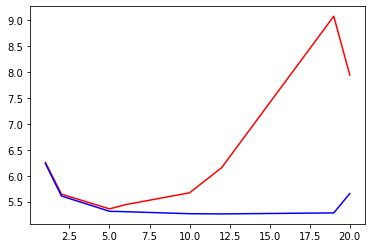

In [1856]:
import matplotlib.pyplot as plt 
plotting(validation_list,train_list,m)

# Q_G

In [1857]:
#degree 10 is choosen
train_new=intilizedata(train)
train_new=trainNewModification(train_new,10)
#print(train_new.shape)
independent,dependent=modifyIndependentDataset(train_new)
w=wCalculation(independent,dependent)
#print(w.shape)
predicted_value=predict(w,independent)
train_error=rmseCalculation(predicted_value,dependent)
print("training error:",train_error)
test_new=intilizedata(test)
#print(test_new.shape)
test_new=trainNewModification(test_new,10)
independent,dependent=modifyIndependentDataset(test_new)
#print(test_new.shape)
predicted_value=predict(w,independent)
test_error=rmseCalculation(predicted_value,dependent)
print("test error:",test_error)

training error: 5.291329850815516
test error: 4.558634878762661


# Question 2

In [1702]:
from numpy import genfromtxt
data_new= genfromtxt('data.csv', delimiter=',')
data_new=data_new[1:,:]
print("data shape",data_new.shape)

data shape (200, 2)


In [1703]:
#degree=[1,2,5,6,10,12,19,20]
degree=[1,2,4,5,10,11,12,15,16,17,19,20,21,22,23,25,26,28,29]
validation_list_new=[]
train_list_new=[]
m_new=[]
for i in range(len(degree)):
    deg=degree[i]
    print("Degree:",deg)
    train_new_temp=intilizedata(data_new)
    #print(train_new_temp.shape)
    train_new_temp=trainNewModification(train_new_temp,deg)
    #print(train_new.shape)
    fold_list_new=kFoldCrossValidation(train_new_temp,5)
    #print(fold_list[0].shape)
    validation_error_new,train_error_new=predictCrossValidation(fold_list_new)
    validation_list_new.append(validation_error_new)
    train_list_new.append(train_error_new)
    m_new.append(deg)
    print("training error:",train_error_new)
    print("validation_error:",validation_error_new)

Degree: 1
training error: 0.8173095533326687
validation_error: 0.8264057684223898
Degree: 2
training error: 0.815751464550923
validation_error: 0.8373846127136971
Degree: 4
training error: 0.7911704206737007
validation_error: 0.7992688972271635
Degree: 5
training error: 0.5703959467889661
validation_error: 0.5867103989431227
Degree: 10
training error: 0.38847827608954344
validation_error: 0.41715383618296176
Degree: 11
training error: 0.385084432655451
validation_error: 0.4115055504293167
Degree: 12
training error: 0.3853121266987716
validation_error: 0.40499028432528184
Degree: 15
training error: 0.3822331171094231
validation_error: 0.43787257500269183
Degree: 16
training error: 0.38174947774538676
validation_error: 0.43051363069022786
Degree: 17
training error: 0.3763908071267211
validation_error: 0.4517336134816009
Degree: 19
training error: 0.37185933593801296
validation_error: 0.4518573882385386
Degree: 20
training error: 0.37059220433546897
validation_error: 0.47797652886730074
D

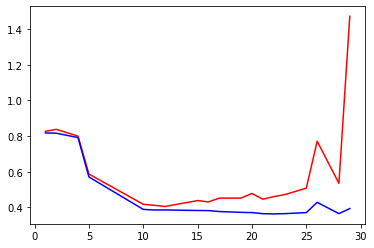

In [1704]:
import matplotlib.pyplot as plt 
plotting(validation_list_new,train_list_new,m_new)

In [1705]:
def plottingData(x,y):
    plt.scatter(x, y, label= "stars", color= "green", marker= "*", s=30)
    plt.scatter(data_new[:,0:1], data_new[:,1:], label= "stars", color= "red", marker= "*", s=30) 
    plt.show()

Degree: 1
Independent shape: (2, 200)
Dependent shape: (200,)
W shape: (2,)
predcited shape (200,)
RMSE: 0.8187007841274979


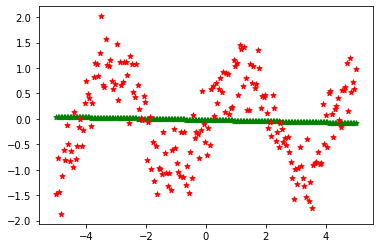

Degree: 2
Independent shape: (3, 200)
Dependent shape: (200,)
W shape: (3,)
predcited shape (200,)
RMSE: 0.818009878137124


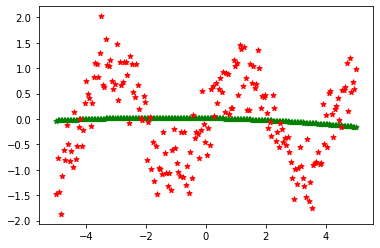

Degree: 4
Independent shape: (5, 200)
Dependent shape: (200,)
W shape: (5,)
predcited shape (200,)
RMSE: 0.7923281937174802


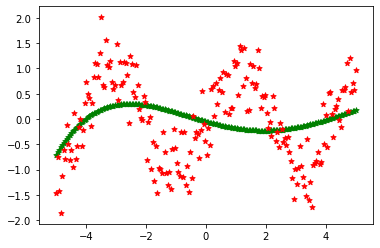

Degree: 5
Independent shape: (6, 200)
Dependent shape: (200,)
W shape: (6,)
predcited shape (200,)
RMSE: 0.5722417445347132


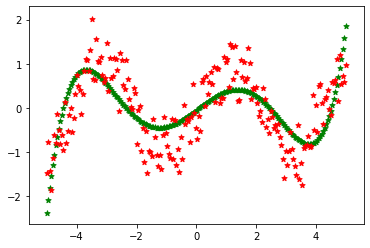

Degree: 10
Independent shape: (11, 200)
Dependent shape: (200,)
W shape: (11,)
predcited shape (200,)
RMSE: 0.39136557421046875


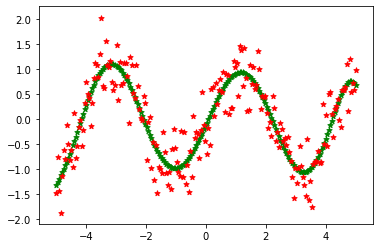

Degree: 15
Independent shape: (16, 200)
Dependent shape: (200,)
W shape: (16,)
predcited shape (200,)
RMSE: 0.38649308676739313


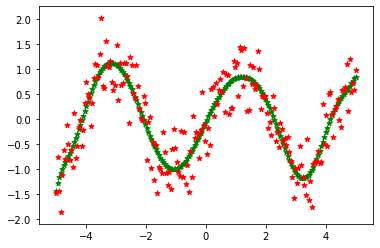

Degree: 30
Independent shape: (31, 200)
Dependent shape: (200,)
W shape: (31,)
predcited shape (200,)
RMSE: 0.36524912599545617


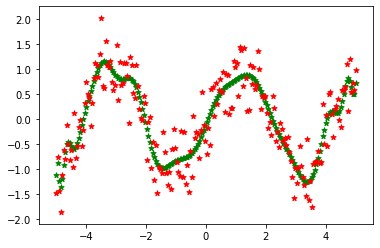

In [1706]:
degree=[1,2,4,5,10,15,30]
#degree=[15]
for i in range(len(degree)):
    deg=degree[i]
    print("Degree:",deg)
    train_new_temp=intilizedata(data_new)
    #print(train_new_temp.shape)
    train_new_temp=trainNewModification(train_new_temp,deg)
    #print(train_new_temp.shape)
    independent_new,dependent_new=modifyIndependentDataset(train_new_temp)
    print("Independent shape:",independent_new.shape)
    print("Dependent shape:",dependent_new.shape)
    w_new=wCalculation(independent_new,dependent_new)
    print("W shape:",w_new.shape)
    predicted_value_new=predict(w_new,independent_new)
    print("predcited shape",predicted_value_new.shape)
    rmse=rmseCalculation(predicted_value_new,dependent_new)
    print("RMSE:",rmse)
    plottingData(data_new[:,0:1],predicted_value_new)